In [1]:
import pandas as pd
import numpy as np

In [2]:
df_original = pd.read_csv("research_data.csv")

In [3]:
df_original.head()

,catalyst,catalyst_family,metal_component,contains_noble_metal,pH,temperature_C,tafel_slope_mV_dec,exchange_current_density_A_cm2,roughness_factor,ECSA_cm2,is_composite,morphology_quality_score,overpotential_mV_10mAcm2
0,NiPh-array-1,Phosphide,Ni,0,3.2,59,125.81,0.27040,1.50,2.36,0,0.54,264.79
1,CoPh-thin-2,Phosphide,Co,0,10.5,50,202.54,0.74074,1.26,1.78,0,0.83,100.37
2,CoPh-nano-3,Phosphide,Co,0,5.0,47,76.10,0.79252,2.86,3.82,1,0.69,228.07
3,NiPh-mesh-4,Phosphide,Ni,0,6.0,51,53.39,0.68172,2.27,8.61,0,0.79,142.93
4,MoPh-mesh-5,Phosphide,Mo,0,6.0,98,65.03,0.69241,1.89,7.66,1,0.60,212.21


In [4]:
df = df_original.drop(['catalyst','temperature_C'],axis = 1)

In [5]:
df.shape

(300, 11)

In [6]:
df.sample(7)

,catalyst_family,metal_component,contains_noble_metal,pH,tafel_slope_mV_dec,exchange_current_density_A_cm2,roughness_factor,ECSA_cm2,is_composite,morphology_quality_score,overpotential_mV_10mAcm2
297,Other,Sn,0,6.0,157.47,0.76992,0.75,8.03,0,0.87,159.95
299,Other,Cu,0,2.0,265.17,0.99816,2.42,6.06,0,0.85,100.59
295,Other,Cu,0,4.6,161.18,0.35717,2.91,1.00,0,0.82,286.10
286,Other,Cu,0,3.4,146.15,0.58147,1.95,7.26,1,0.68,175.29
58,Phosphide,Ni,0,4.4,164.92,0.20778,1.80,9.90,0,0.44,111.70
220,Noble Metal,Ru,1,1.4,36.91,0.03658,0.70,7.58,0,0.80,88.53
34,Phosphide,Fe,0,4.9,158.91,0.22329,1.92,9.39,1,0.64,179.85


In [7]:
df['catalyst_family'].value_counts()

catalyst_family
Phosphide      60
Sulfide        60
Carbide        60
Noble Metal    60
Other          60
Name: count, dtype: int64

In [8]:
df.columns

Index(['catalyst_family', 'metal_component', 'contains_noble_metal', 'pH',
       'tafel_slope_mV_dec', 'exchange_current_density_A_cm2',
       'roughness_factor', 'ECSA_cm2', 'is_composite',
       'morphology_quality_score', 'overpotential_mV_10mAcm2'],
      dtype='object')

In [9]:
import seaborn as sns

<Axes: xlabel='tafel_slope_mV_dec', ylabel='Count'>

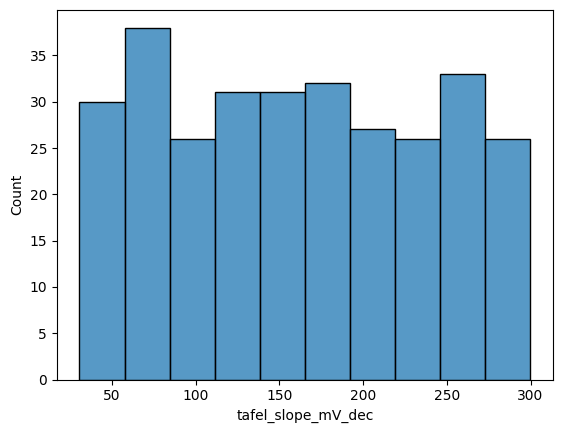

In [10]:
sns.histplot(df['tafel_slope_mV_dec'])

<Axes: ylabel='tafel_slope_mV_dec'>

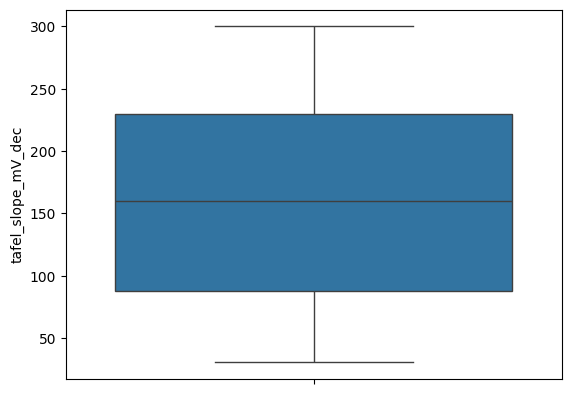

In [11]:
sns.boxplot(df['tafel_slope_mV_dec'])

<Axes: xlabel='exchange_current_density_A_cm2', ylabel='Count'>

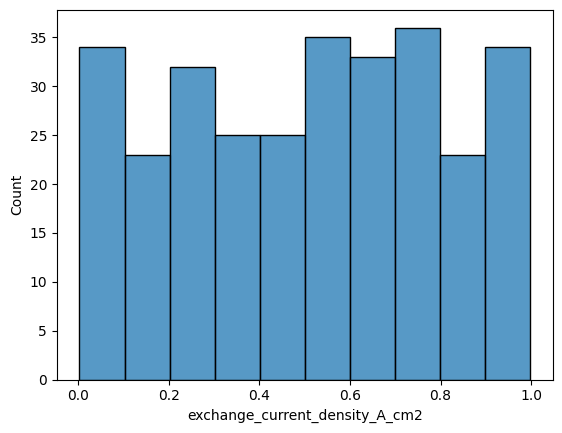

In [12]:
sns.histplot(df['exchange_current_density_A_cm2'])

<Axes: ylabel='exchange_current_density_A_cm2'>

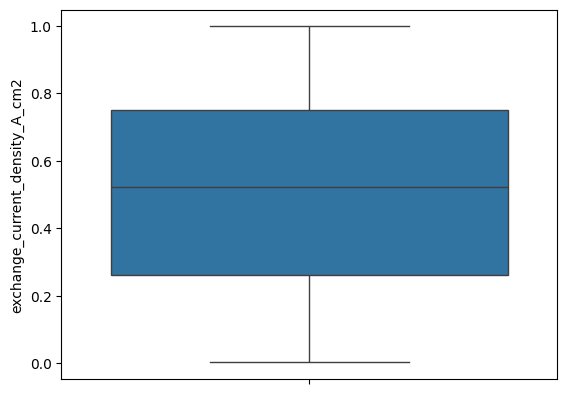

In [13]:
sns.boxplot(df['exchange_current_density_A_cm2'])

<Axes: xlabel='overpotential_mV_10mAcm2', ylabel='Count'>

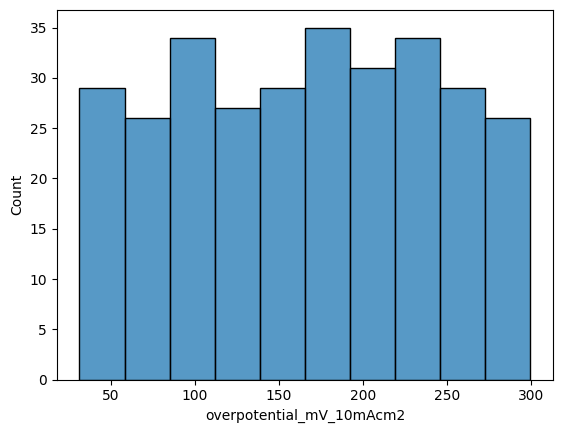

In [14]:
sns.histplot(df['overpotential_mV_10mAcm2'])

<Axes: ylabel='overpotential_mV_10mAcm2'>

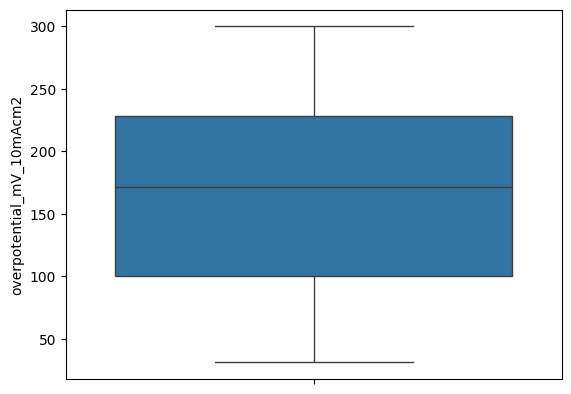

In [15]:
sns.boxplot(df['overpotential_mV_10mAcm2'])

In [16]:
df.head()

,catalyst_family,metal_component,contains_noble_metal,pH,tafel_slope_mV_dec,exchange_current_density_A_cm2,roughness_factor,ECSA_cm2,is_composite,morphology_quality_score,overpotential_mV_10mAcm2
0,Phosphide,Ni,0,3.2,125.81,0.27040,1.50,2.36,0,0.54,264.79
1,Phosphide,Co,0,10.5,202.54,0.74074,1.26,1.78,0,0.83,100.37
2,Phosphide,Co,0,5.0,76.10,0.79252,2.86,3.82,1,0.69,228.07
3,Phosphide,Ni,0,6.0,53.39,0.68172,2.27,8.61,0,0.79,142.93
4,Phosphide,Mo,0,6.0,65.03,0.69241,1.89,7.66,1,0.60,212.21


In [17]:
df['metal_component'].unique()

array(['Ni', 'Co', 'Mo', 'W', 'Fe', 'V', 'Ti', 'Ir', 'Pt', 'Ru', 'Pd',
       'Rh', 'Mn', 'Zn', 'Sn', 'Cu'], dtype=object)

In [18]:
df['catalyst_family'].unique()

array(['Phosphide', 'Sulfide', 'Carbide', 'Noble Metal', 'Other'],
      dtype=object)

In [19]:
bins = [0, 150, 250, df["overpotential_mV_10mAcm2"].max()]
labels = ["Low", "Medium", "High"]

df["overpotential_class"] = pd.cut(df["overpotential_mV_10mAcm2"], bins=bins, labels=labels)

In [20]:
bins_tafel = [0, 80, 150, df["tafel_slope_mV_dec"].max()]
labels = ["Low", "Medium", "High"]
df["tafel_class"] = pd.cut(df["tafel_slope_mV_dec"], bins=bins_tafel, labels=labels)

In [21]:
df.sample(7)

,catalyst_family,metal_component,contains_noble_metal,pH,tafel_slope_mV_dec,exchange_current_density_A_cm2,roughness_factor,ECSA_cm2,is_composite,morphology_quality_score,overpotential_mV_10mAcm2,overpotential_class,tafel_class
225,Noble Metal,Ir,1,8.7,282.12,0.44532,0.73,1.59,0,0.65,103.85,Low,High
205,Noble Metal,Pd,1,12.2,151.52,0.66804,2.99,6.35,1,0.99,54.01,Low,High
283,Other,Zn,0,11.4,103.01,0.59250,1.11,6.25,1,0.76,210.90,Medium,Medium
110,Sulfide,V,0,3.3,84.56,0.00424,0.91,3.77,1,0.56,271.97,High,Medium
150,Carbide,Fe,0,4.6,266.18,0.17447,0.97,5.38,1,0.74,171.85,Medium,High
74,Sulfide,Ni,0,4.7,250.45,0.38449,1.41,7.86,1,0.98,38.83,Low,High
257,Other,Zn,0,11.8,137.01,0.60481,2.73,2.38,1,0.85,200.21,Medium,Medium


In [22]:
df.drop(['tafel_slope_mV_dec','overpotential_mV_10mAcm2'],axis=1,inplace=True)


In [23]:
df.to_csv("Dataset.csv",index=False)

## Model Training

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest

--- Top 10 Predicted Catalyst Combinations by Random Forest ---
    catalyst_family metal_component Predicted Performance Confidence
77          Sulfide              Fe                  Best        72%
195     Noble Metal              Ir                  Best        72%
33        Phosphide              Mo                  Best        71%
220     Noble Metal              Ru                  Best        70%
204     Noble Metal              Pt                  Best        69%
187     Noble Metal              Rh                  Best        69%
3         Phosphide              Ni                  Best        69%
19        Phosphide              Fe                  Best        69%
194     Noble Metal              Ir                  Best        69%
221     Noble Metal              Ru                  Best        68%

--- Generating Feature Importance Plot ---
Feature importance plot saved as 'catalyst_feature_importance.png'


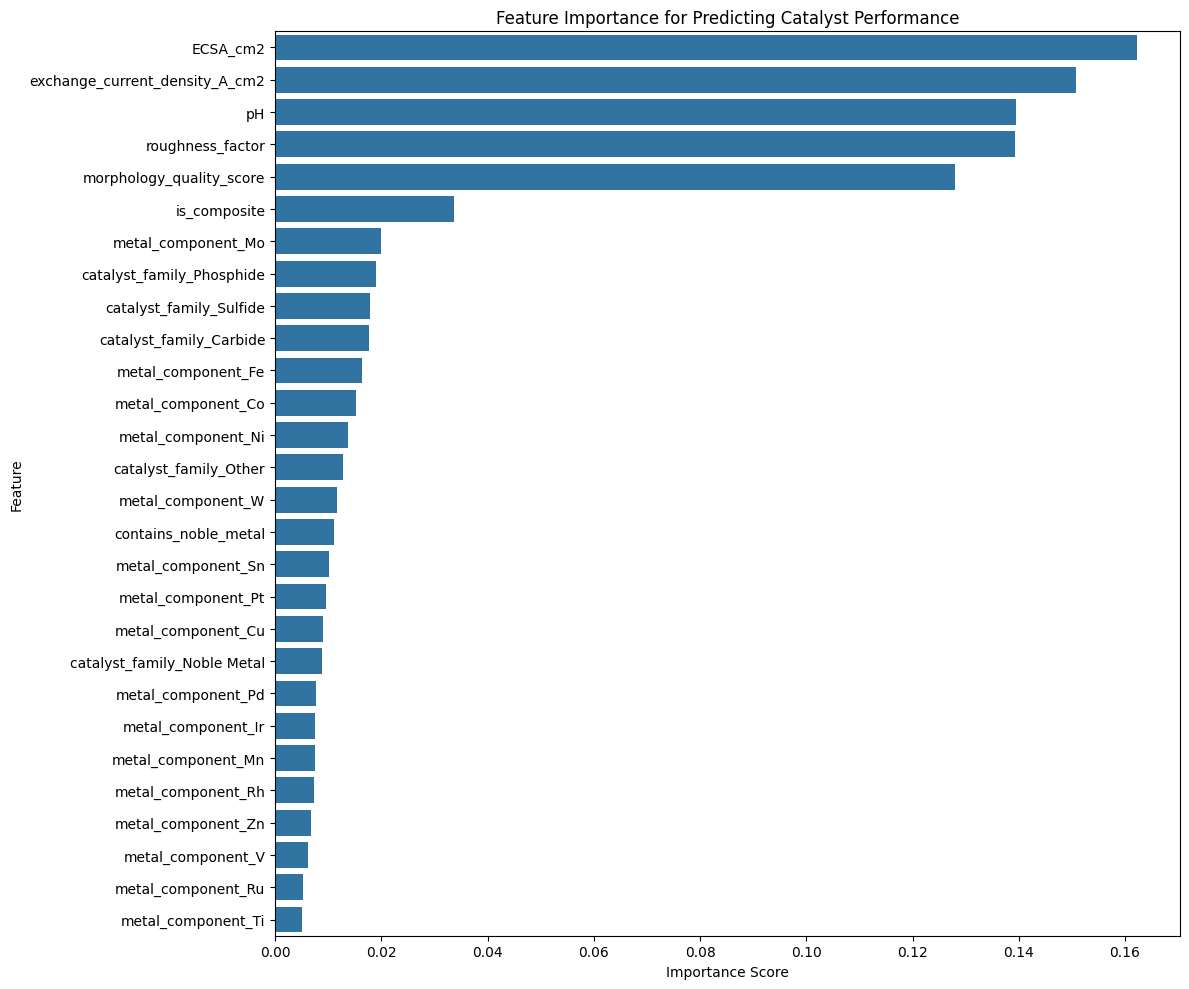

In [25]:

df['performance_class'] = 0
df.loc[(df['overpotential_class'] == 'Low') & (df['tafel_class'] == 'Low'), 'performance_class'] = 3
df.loc[((df['overpotential_class'] == 'Low') & (df['tafel_class'] == 'Medium')) | ((df['overpotential_class'] == 'Medium') & (df['tafel_class'] == 'Low')), 'performance_class'] = 2
df.loc[((df['overpotential_class'] == 'Medium') & (df['tafel_class'] == 'Medium')) | ((df['overpotential_class'] == 'High') & (df['tafel_class'] == 'Low')) | ((df['overpotential_class'] == 'Low') & (df['tafel_class'] == 'High')),'performance_class'] = 1


X = df.drop(['overpotential_class', 'tafel_class', 'performance_class'], axis=1)
y = df['performance_class']


categorical_features = ['catalyst_family', 'metal_component']
numerical_features = X.columns.drop(categorical_features)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])


model.fit(X, y)


predictions = model.predict(X)
probabilities = model.predict_proba(X)


results_df = X.copy()
results_df['Predicted Performance Class'] = predictions
class_index = np.where(model.classes_ == 3)[0][0]
results_df['Confidence'] = probabilities[:, class_index]
performance_map = {3: 'Best', 2: 'Good', 1: 'Average', 0: 'Poor'}
results_df['Predicted Performance'] = results_df['Predicted Performance Class'].map(performance_map)


best_predictions = results_df[results_df['Predicted Performance'] == 'Best']
top_10_best = best_predictions.sort_values(by='Confidence', ascending=False).head(10)
display_columns = [
    'catalyst_family',
    'metal_component',
    'Predicted Performance',
    'Confidence'
]
top_10_best['Confidence'] = top_10_best['Confidence'].apply(lambda x: f"{x:.0%}")

print("--- Top 10 Predicted Catalyst Combinations by Random Forest ---")
print(top_10_best[display_columns])


print("\n--- Generating Feature Importance Plot ---")


classifier = model.named_steps['classifier']
preprocessor_transformer = model.named_steps['preprocessor']


ohe_feature_names = preprocessor_transformer.named_transformers_['cat'].get_feature_names_out(categorical_features)

feature_names = np.concatenate([numerical_features, ohe_feature_names])


importances = classifier.feature_importances_


feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance for Predicting Catalyst Performance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()


plt.savefig('catalyst_feature_importance.png')

print("Feature importance plot saved as 'catalyst_feature_importance.png'")

# Gradient Boost

--- Top 10 Predicted Catalyst Combinations (Gradient Boosting) ---
    catalyst_family metal_component Predicted Performance Confidence
33        Phosphide              Mo                  Best       100%
195     Noble Metal              Ir                  Best        99%
204     Noble Metal              Pt                  Best        99%
77          Sulfide              Fe                  Best        99%
153         Carbide              Fe                  Best        99%
177         Carbide              Fe                  Best        99%
220     Noble Metal              Ru                  Best        98%
87          Sulfide              Fe                  Best        98%
14        Phosphide              Mo                  Best        98%
54        Phosphide              Mo                  Best        98%

--- Generating Feature Importance Plot (Gradient Boosting) ---
Feature importance plot saved as 'gb_feature_importance.png'


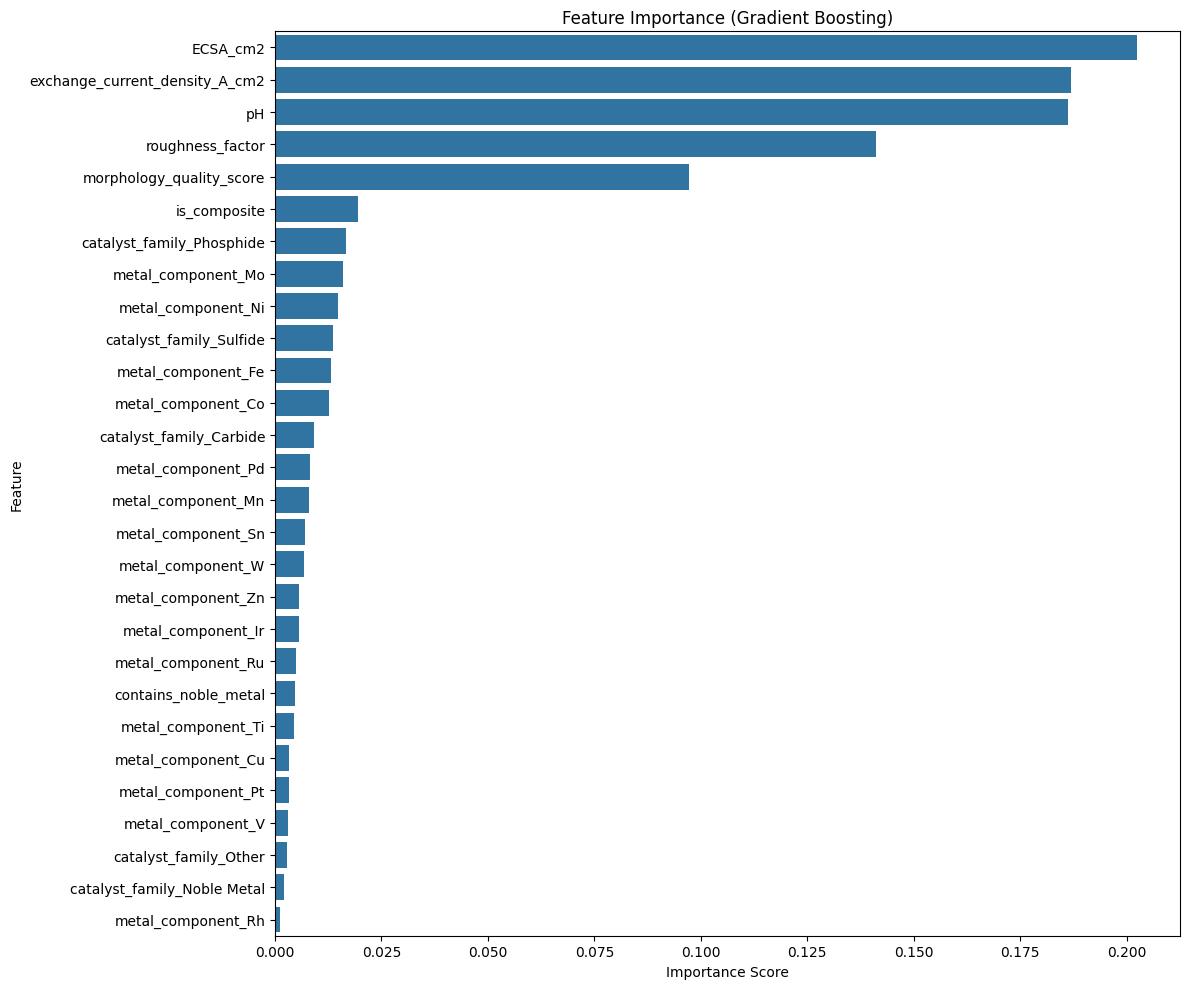

In [26]:

X = df.drop(['overpotential_class', 'tafel_class', 'performance_class'], axis=1)
y = df['performance_class']


categorical_features = ['catalyst_family', 'metal_component']
numerical_features = X.columns.drop(categorical_features)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', GradientBoostingClassifier(n_estimators=100,max_depth = 5, random_state=42))])


model.fit(X, y)


predictions = model.predict(X)
probabilities = model.predict_proba(X)


results_df = X.copy()
results_df['Predicted Performance Class'] = predictions
class_index = np.where(model.classes_ == 3)[0][0]
results_df['Confidence'] = probabilities[:, class_index]
performance_map = {3: 'Best', 2: 'Good', 1: 'Average', 0: 'Poor'}
results_df['Predicted Performance'] = results_df['Predicted Performance Class'].map(performance_map)

best_predictions = results_df[results_df['Predicted Performance'] == 'Best']
top_10_best = best_predictions.sort_values(by='Confidence', ascending=False).head(10)
display_columns = [
    'catalyst_family',
    'metal_component',
    'Predicted Performance',
    'Confidence'
]
top_10_best['Confidence'] = top_10_best['Confidence'].apply(lambda x: f"{x:.0%}")

print("--- Top 10 Predicted Catalyst Combinations (Gradient Boosting) ---")
print(top_10_best[display_columns])


print("\n--- Generating Feature Importance Plot (Gradient Boosting) ---")
classifier = model.named_steps['classifier']
preprocessor_transformer = model.named_steps['preprocessor']
ohe_feature_names = preprocessor_transformer.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, ohe_feature_names])
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('gb_feature_importance.png')
print("Feature importance plot saved as 'gb_feature_importance.png'")

# Xgboost

--- Top 10 Predicted Catalyst Combinations (XGBoost) ---
    catalyst_family metal_component Predicted Performance Confidence
195     Noble Metal              Ir                  Best        97%
221     Noble Metal              Ru                  Best        97%
77          Sulfide              Fe                  Best        96%
177         Carbide              Fe                  Best        96%
33        Phosphide              Mo                  Best        96%
188     Noble Metal              Pd                  Best        96%
153         Carbide              Fe                  Best        95%
75          Sulfide               V                  Best        95%
3         Phosphide              Ni                  Best        95%
240           Other              Mn                  Best        95%

--- Generating Feature Importance Plot (XGBoost) ---
Feature importance plot saved as 'xgb_feature_importance.png'


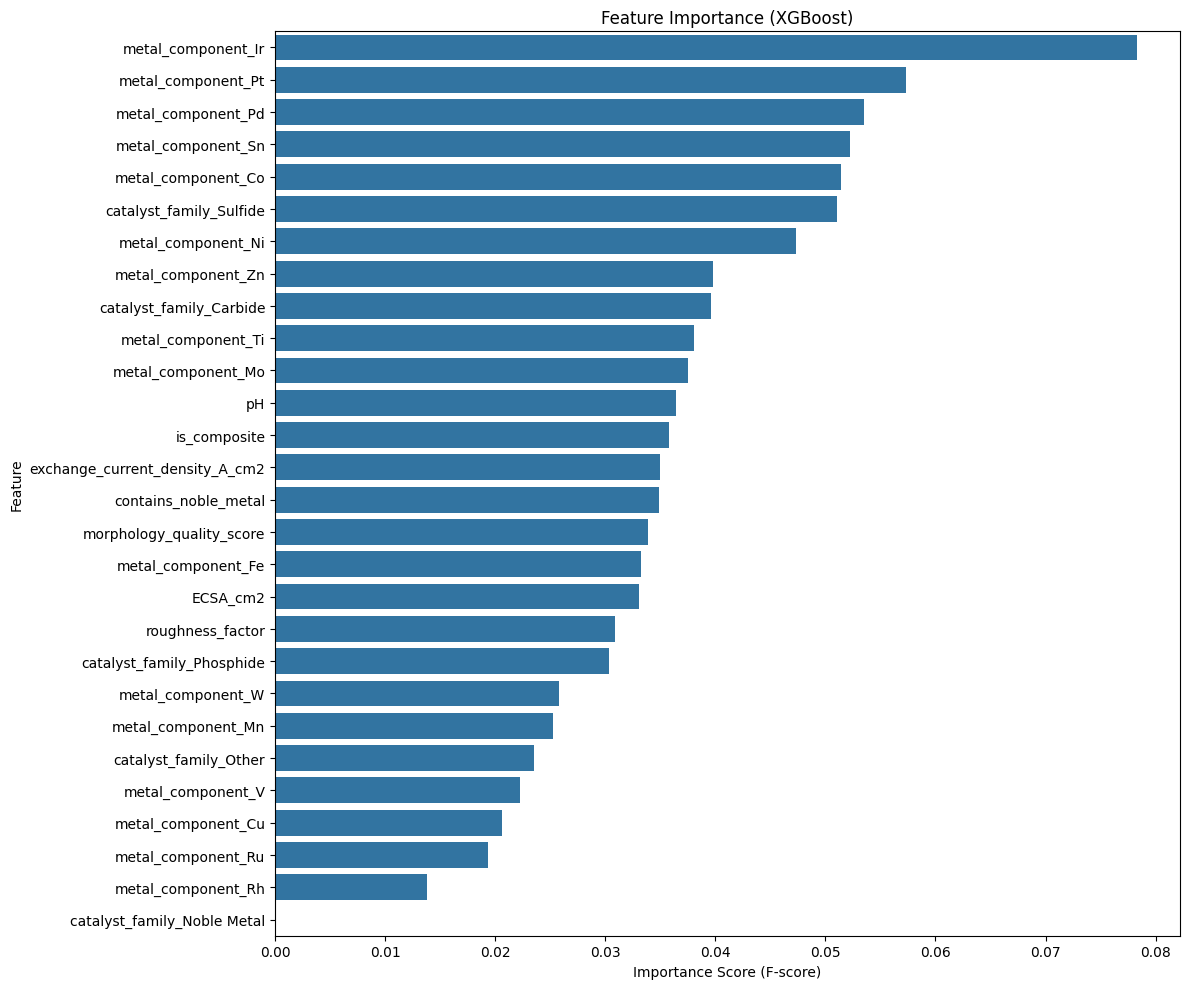

In [27]:
X = df.drop(['overpotential_class', 'tafel_class', 'performance_class'], axis=1)
y = df['performance_class']

categorical_features = ['catalyst_family', 'metal_component']
numerical_features = X.columns.drop(categorical_features)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', xgb.XGBClassifier(objective='multi:softprob', use_label_encoder=False, eval_metric='mlogloss',max_depth = 5,random_state=42))])


model.fit(X, y)

predictions = model.predict(X)
probabilities = model.predict_proba(X)

results_df = X.copy()
results_df['Predicted Performance Class'] = predictions
class_index = np.where(model.classes_ == 3)[0][0]
results_df['Confidence'] = probabilities[:, class_index]
performance_map = {3: 'Best', 2: 'Good', 1: 'Average', 0: 'Poor'}
results_df['Predicted Performance'] = results_df['Predicted Performance Class'].map(performance_map)


best_predictions = results_df[results_df['Predicted Performance'] == 'Best']
top_10_best = best_predictions.sort_values(by='Confidence', ascending=False).head(10)
display_columns = [
    'catalyst_family',
    'metal_component',
    'Predicted Performance',
    'Confidence'
]
top_10_best['Confidence'] = top_10_best['Confidence'].apply(lambda x: f"{x:.0%}")

print("--- Top 10 Predicted Catalyst Combinations (XGBoost) ---")
print(top_10_best[display_columns])


print("\n--- Generating Feature Importance Plot (XGBoost) ---")
classifier = model.named_steps['classifier']
preprocessor_transformer = model.named_steps['preprocessor']
ohe_feature_names = preprocessor_transformer.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, ohe_feature_names])
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance Score (F-score)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('xgb_feature_importance.png')
print("Feature importance plot saved as 'xgb_feature_importance.png'")

# Decision Tree Classifiers

--- Top 10 Predicted Catalyst Combinations (Decision Tree) ---
    catalyst_family metal_component Predicted Performance Confidence
14        Phosphide              Mo                  Best       100%
54        Phosphide              Mo                  Best       100%
95          Sulfide              Mo                  Best       100%
77          Sulfide              Fe                  Best        83%
188     Noble Metal              Pd                  Best        83%
194     Noble Metal              Ir                  Best        83%
221     Noble Metal              Ru                  Best        83%
240           Other              Mn                  Best        83%
261           Other              Sn                  Best        83%
57        Phosphide              Fe                  Best        67%

--- Generating Feature Importance Plot (Decision Tree) ---
Feature importance plot saved as 'dt_feature_importance.png'


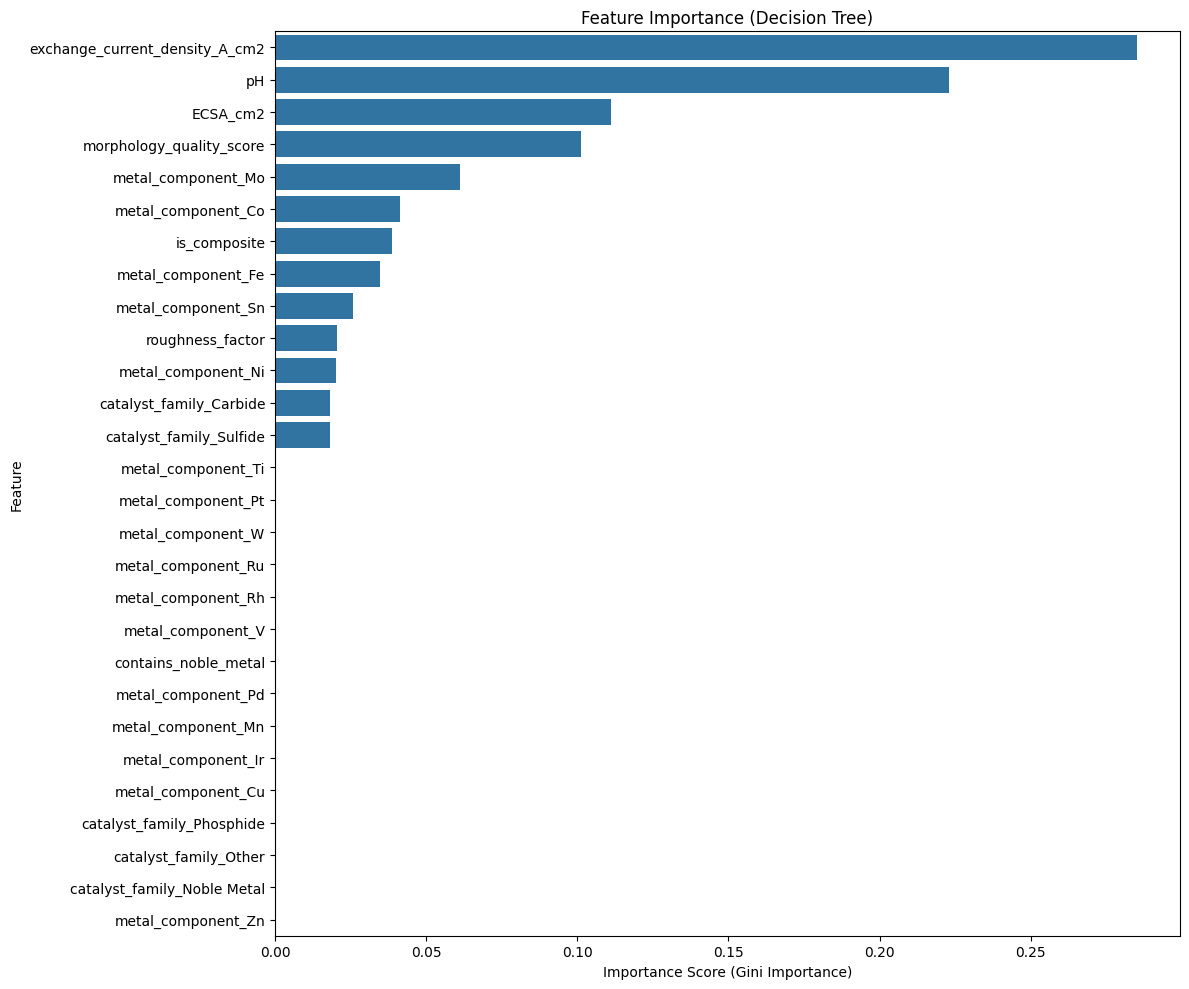

In [28]:
X = df.drop(['overpotential_class', 'tafel_class', 'performance_class'], axis=1)
y = df['performance_class']

categorical_features = ['catalyst_family', 'metal_component']
numerical_features = X.columns.drop(categorical_features)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(max_depth=6,random_state=42))])


model.fit(X, y)


predictions = model.predict(X)
probabilities = model.predict_proba(X)

results_df = X.copy()
results_df['Predicted Performance Class'] = predictions
class_index = np.where(model.classes_ == 3)[0][0]
results_df['Confidence'] = probabilities[:, class_index]
performance_map = {3: 'Best', 2: 'Good', 1: 'Average', 0: 'Poor'}
results_df['Predicted Performance'] = results_df['Predicted Performance Class'].map(performance_map)

best_predictions = results_df[results_df['Predicted Performance'] == 'Best']
top_10_best = best_predictions.sort_values(by='Confidence', ascending=False).head(10)
display_columns = [
    'catalyst_family',
    'metal_component',
    'Predicted Performance',
    'Confidence'
]
top_10_best['Confidence'] = top_10_best['Confidence'].apply(lambda x: f"{x:.0%}")

print("--- Top 10 Predicted Catalyst Combinations (Decision Tree) ---")
print(top_10_best[display_columns])


print("\n--- Generating Feature Importance Plot (Decision Tree) ---")
classifier = model.named_steps['classifier']
preprocessor_transformer = model.named_steps['preprocessor']
ohe_feature_names = preprocessor_transformer.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numerical_features, ohe_feature_names])
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score (Gini Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('dt_feature_importance.png')
print("Feature importance plot saved as 'dt_feature_importance.png'")

## Phosphide family with Metal component as Molydebnum is mostly at the top